In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
weather = pd.read_csv('weatherAUS.csv')

In [145]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [146]:
# adding features: year, month, day (data engineering)
weather['year'] = weather['Date'].apply(lambda x: x[0:4])
weather['month'] = weather['Date'].apply(lambda x: x[5:7])
weather['day'] = weather['Date'].apply(lambda x: x[8:])

In [147]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,05


In [148]:
weather = weather.drop('Date', 1)

In [149]:
weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,01
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,02
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,03
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,04
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,05


In [248]:
weather['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [150]:
# EDA sections

In [151]:
weather.shape

(142193, 26)

In [152]:
weather.isnull().any() # most of the columns have missing values

Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM          False
RainTomorrow     False
year             False
month            False
day              False
dtype: bool

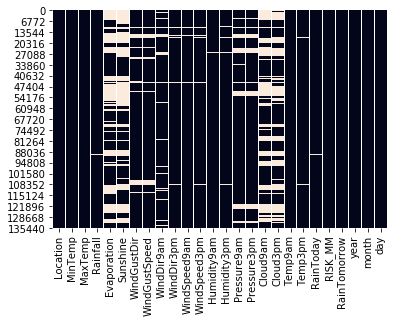

In [153]:
sns.heatmap(weather.isnull(), cbar=False)

In [154]:
weather_na = weather.isna()
weather_na.sum()/len(weather)*100 
# as Evaporation, sunshine, cloud9am and cloud3pm are important we will try different approaches.

Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
year              0.000000
month             0.000000
day               0.000000
dtype: float64

In [155]:
# checking the average morning temperature in cities
weather.groupby('Location').Temp9am.mean()

Location
Adelaide            16.973193
Albany              16.233154
Albury              14.348620
AliceSprings        21.328868
BadgerysCreek       16.574141
Ballarat            11.664125
Bendigo             13.844789
Brisbane            21.829186
Cairns              25.799465
Canberra            12.681594
Cobar               18.084507
CoffsHarbour        20.115356
Dartmoor            12.587963
Darwin              27.186435
GoldCoast           22.354262
Hobart              12.464073
Katherine           26.640500
Launceston          12.027348
Melbourne           14.636046
MelbourneAirport    14.124925
Mildura             15.530872
Moree               18.804415
MountGambier        13.787356
MountGinini          6.890845
Newcastle           18.102842
Nhil                13.377693
NorahHead           18.489389
NorfolkIsland       19.745353
Nuriootpa           14.858992
PearceRAAF          18.961631
Penrith             16.949406
Perth               18.573598
PerthAirport        18.773480
P

In [156]:
# number of cities
weather['Location'].value_counts().shape

(49,)

In [157]:
# pick Sydney as example of eastern 
sy = weather[weather['Location'] == 'Sydney']
sy

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
29497,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,...,8.0,8.0,20.7,20.9,Yes,6.0,Yes,2008,02,01
29498,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,...,7.0,7.0,22.4,24.8,Yes,6.6,Yes,2008,02,02
29499,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,...,7.0,8.0,23.5,23.0,Yes,18.8,Yes,2008,02,03
29500,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,...,8.0,8.0,21.4,20.9,Yes,77.4,Yes,2008,02,04
29501,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,...,8.0,8.0,22.5,25.5,Yes,1.6,Yes,2008,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32829,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,...,2.0,2.0,10.5,17.9,No,0.0,No,2017,06,21
32830,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,...,2.0,2.0,11.0,18.7,No,0.0,No,2017,06,22
32831,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,...,6.0,6.0,10.2,17.3,No,0.0,No,2017,06,23
32832,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,W,...,5.0,2.0,12.4,19.0,No,0.0,No,2017,06,24


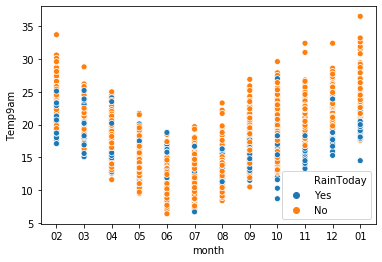

In [158]:
ax = sns.scatterplot(x="month", y="Temp9am",
                     hue="RainToday",
                     sizes=(50, 200),
                     data=sy)

In [159]:
# pick Sydney as example of western 
ph = weather[weather['Location'] == 'Perth']
ph

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
117707,Perth,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,E,...,2.0,3.0,8.5,18.1,No,0.0,No,2008,07,01
117708,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,ENE,...,0.0,6.0,11.1,19.7,No,0.4,No,2008,07,02
117709,Perth,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,WNW,...,1.0,3.0,12.1,17.7,No,1.8,Yes,2008,07,03
117710,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,NNW,...,6.0,6.0,13.2,17.7,Yes,1.8,Yes,2008,07,04
117711,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,SW,...,7.0,5.0,15.9,16.0,Yes,6.8,Yes,2008,07,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120895,Perth,10.3,19.9,0.2,1.8,7.5,NW,37.0,NNE,NNW,...,5.0,6.0,13.0,18.5,No,61.2,Yes,2017,06,21
120896,Perth,13.0,16.8,61.2,3.6,0.0,SSW,46.0,W,SW,...,7.0,7.0,16.4,15.6,Yes,0.4,No,2017,06,22
120897,Perth,13.3,18.9,0.4,1.8,6.5,SE,37.0,SE,ESE,...,6.0,6.0,15.1,18.0,No,0.0,No,2017,06,23
120898,Perth,11.5,18.2,0.0,3.8,9.3,SE,30.0,ESE,ESE,...,1.0,3.0,14.0,17.6,No,0.0,No,2017,06,24


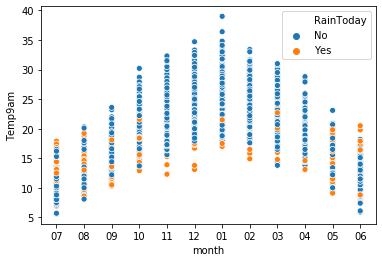

In [160]:
ax = sns.scatterplot(x="month", y="Temp9am",
                     hue="RainToday",
                     sizes=(50, 200),
                     data=ph)

In [161]:
# pick Sydney as example of northern 
dw = weather[weather['Location'] == 'Darwin']
dw

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
135921,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,SSE,...,1.0,2.0,25.4,32.3,No,0.0,No,2008,07,01
135922,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,E,...,1.0,1.0,24.3,31.9,No,0.0,No,2008,07,02
135923,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,ENE,...,0.0,1.0,24.3,31.2,No,0.0,No,2008,07,03
135924,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,E,...,2.0,6.0,21.3,29.8,No,0.0,No,2008,07,04
135925,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,E,...,1.0,1.0,22.2,29.6,No,0.0,No,2008,07,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,0.0,1.0,24.5,32.3,No,0.0,No,2017,06,20
139109,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,7.0,0.0,24.8,32.0,No,0.0,No,2017,06,21
139110,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,0.0,0.0,24.8,32.1,No,0.0,No,2017,06,22
139111,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1.0,1.0,24.8,29.2,No,0.0,No,2017,06,23


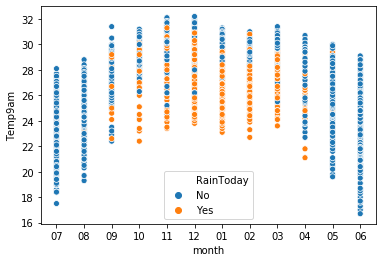

In [162]:
ax = sns.scatterplot(x="month", y="Temp9am",
                     hue="RainToday",
                     sizes=(50, 200),
                     data=dw)

In [163]:
# trying to fit in the missing values with mode
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [164]:
imp.fit(weather)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [165]:
X = imp.transform(weather)

In [166]:
weather_tr = pd.DataFrame(X, columns=weather.columns)

In [167]:
weather_tr.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,4,0,W,44,W,WNW,...,8,7,16.9,21.8,No,0,No,2008,12,01
1,Albury,7.4,25.1,0,4,0,WNW,44,NNW,WSW,...,7,7,17.2,24.3,No,0,No,2008,12,02
2,Albury,12.9,25.7,0,4,0,WSW,46,W,WSW,...,7,2,21,23.2,No,0,No,2008,12,03
3,Albury,9.2,28,0,4,0,NE,24,SE,E,...,7,7,18.1,26.5,No,1,No,2008,12,04
4,Albury,17.5,32.3,1,4,0,W,41,ENE,NW,...,7,8,17.8,29.7,No,0.2,No,2008,12,05


In [168]:
weather_tr.isnull().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
year             False
month            False
day              False
dtype: bool

In [169]:
corr = weather.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1,0.74,0.1,0.47,0.073,0.18,0.18,0.18,-0.23,0.006,-0.45,-0.46,0.078,0.02,0.9,0.71,0.12
MaxTemp,0.74,1,-0.075,0.59,0.47,0.068,0.015,0.051,-0.51,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98,-0.044
Rainfall,0.1,-0.075,1,-0.065,-0.23,0.13,0.087,0.058,0.22,0.26,-0.17,-0.13,0.2,0.17,0.011,-0.079,0.31
Evaporation,0.47,0.59,-0.065,1,0.37,0.2,0.19,0.13,-0.51,-0.39,-0.27,-0.29,-0.19,-0.18,0.55,0.57,-0.043
Sunshine,0.073,0.47,-0.23,0.37,1,-0.033,0.008,0.056,-0.49,-0.63,0.041,-0.02,-0.68,-0.7,0.29,0.49,-0.29
WindGustSpeed,0.18,0.068,0.13,0.2,-0.033,1,0.6,0.69,-0.22,-0.027,-0.46,-0.41,0.071,0.11,0.15,0.033,0.16
WindSpeed9am,0.18,0.015,0.087,0.19,0.008,0.6,1,0.52,-0.27,-0.032,-0.23,-0.17,0.024,0.054,0.13,0.0051,0.069
WindSpeed3pm,0.18,0.051,0.058,0.13,0.056,0.69,0.52,1,-0.15,0.016,-0.3,-0.25,0.053,0.025,0.16,0.029,0.049
Humidity9am,-0.23,-0.51,0.22,-0.51,-0.49,-0.22,-0.27,-0.15,1,0.67,0.14,0.19,0.45,0.36,-0.47,-0.5,0.17
Humidity3pm,0.006,-0.51,0.26,-0.39,-0.63,-0.027,-0.032,0.016,0.67,1,-0.027,0.052,0.52,0.52,-0.22,-0.56,0.31


In [170]:
weather_tr.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,4,0,W,44,W,WNW,...,8,7,16.9,21.8,No,0,No,2008,12,01
1,Albury,7.4,25.1,0,4,0,WNW,44,NNW,WSW,...,7,7,17.2,24.3,No,0,No,2008,12,02
2,Albury,12.9,25.7,0,4,0,WSW,46,W,WSW,...,7,2,21,23.2,No,0,No,2008,12,03
3,Albury,9.2,28,0,4,0,NE,24,SE,E,...,7,7,18.1,26.5,No,1,No,2008,12,04
4,Albury,17.5,32.3,1,4,0,W,41,ENE,NW,...,7,8,17.8,29.7,No,0.2,No,2008,12,05


In [171]:
weather_tr.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'year', 'month',
       'day'],
      dtype='object')

In [172]:
weather_tr.Humidity9am

0         71
1         44
2         38
3         45
4         82
          ..
142188    59
142189    51
142190    56
142191    53
142192    51
Name: Humidity9am, Length: 142193, dtype: object

In [232]:
# encoding the data
windGustdir = pd.get_dummies(weather['WindGustDir'], drop_first=True)
rainToday = pd.get_dummies(weather['RainToday'], drop_first=True)

In [234]:
# Use  .concat() method to merge the series data into one dataframe
new_weather = pd.concat([weather_tr, windGustdir, rainToday], axis=1)

In [235]:
# Drop columns with categorical data
new_weather.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RISK_MM', 'year'], axis=1, inplace=True)

In [236]:
new_weather.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'month', 'day', 'ENE', 'ESE', 'N',
       'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW',
       'WSW', 'Yes'],
      dtype='object')

In [237]:
# quick check the importance of each columns
X = new_weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'month', 'day', 'ENE', 'ESE', 'N',
       'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW',
       'WSW', 'Yes']]
y = new_weather['RainTomorrow']

In [267]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [268]:
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [269]:
dtreemodel.classes_

array(['No', 'Yes'], dtype=object)

In [270]:
dtreemodel.feature_importances_

array([0.04701188, 0.04368646, 0.04025159, 0.02771843, 0.03828741,
       0.06847952, 0.03237122, 0.03337343, 0.04527127, 0.27224227,
       0.04496225, 0.07027103, 0.01578812, 0.01535412, 0.04210487,
       0.0415992 , 0.0266556 , 0.04202283, 0.00270402, 0.00296188,
       0.00363974, 0.0032423 , 0.00336595, 0.00489995, 0.00375698,
       0.00333073, 0.00315343, 0.00297026, 0.00263635, 0.00380924,
       0.00360016, 0.00343655, 0.00323071, 0.00181026])

In [271]:
importances_tuples = list(zip(dtreemodel.feature_importances_, X))

In [272]:
sorted(importances_tuples)

[(0.0018102613583841642, 'Yes'),
 (0.0026363454333758183, 'SSW'),
 (0.0027040173557076243, 'ENE'),
 (0.002961883795288545, 'ESE'),
 (0.00297025589770367, 'SSE'),
 (0.0031534349842116233, 'SE'),
 (0.0032307094546367835, 'WSW'),
 (0.0032422956606002326, 'NE'),
 (0.003330728459708001, 'S'),
 (0.003365952168512353, 'NNE'),
 (0.0034365498093174717, 'WNW'),
 (0.003600160352403073, 'W'),
 (0.0036397445834361122, 'N'),
 (0.0037569830984288703, 'NW'),
 (0.003809235102612816, 'SW'),
 (0.004899953224752996, 'NNW'),
 (0.015354121410676913, 'Cloud3pm'),
 (0.01578811669291911, 'Cloud9am'),
 (0.026655596495263275, 'month'),
 (0.027718425049415164, 'Evaporation'),
 (0.03237121687119704, 'WindSpeed9am'),
 (0.03337342954273708, 'WindSpeed3pm'),
 (0.03828740530306004, 'Sunshine'),
 (0.040251593069492636, 'Rainfall'),
 (0.04159920472828657, 'Temp3pm'),
 (0.04202282581743927, 'day'),
 (0.04210487325351735, 'Temp9am'),
 (0.04368646441879249, 'MaxTemp'),
 (0.04496225343534042, 'Pressure9am'),
 (0.04527126540

In [273]:
features_corr = pd.DataFrame(importances_tuples, columns=['corr', 'features'])
features_corr

,corr,features
0,0.047012,MinTemp
1,0.043686,MaxTemp
2,0.040252,Rainfall
3,0.027718,Evaporation
4,0.038287,Sunshine
5,0.068480,WindGustSpeed
6,0.032371,WindSpeed9am
7,0.033373,WindSpeed3pm
8,0.045271,Humidity9am
9,0.272242,Humidity3pm


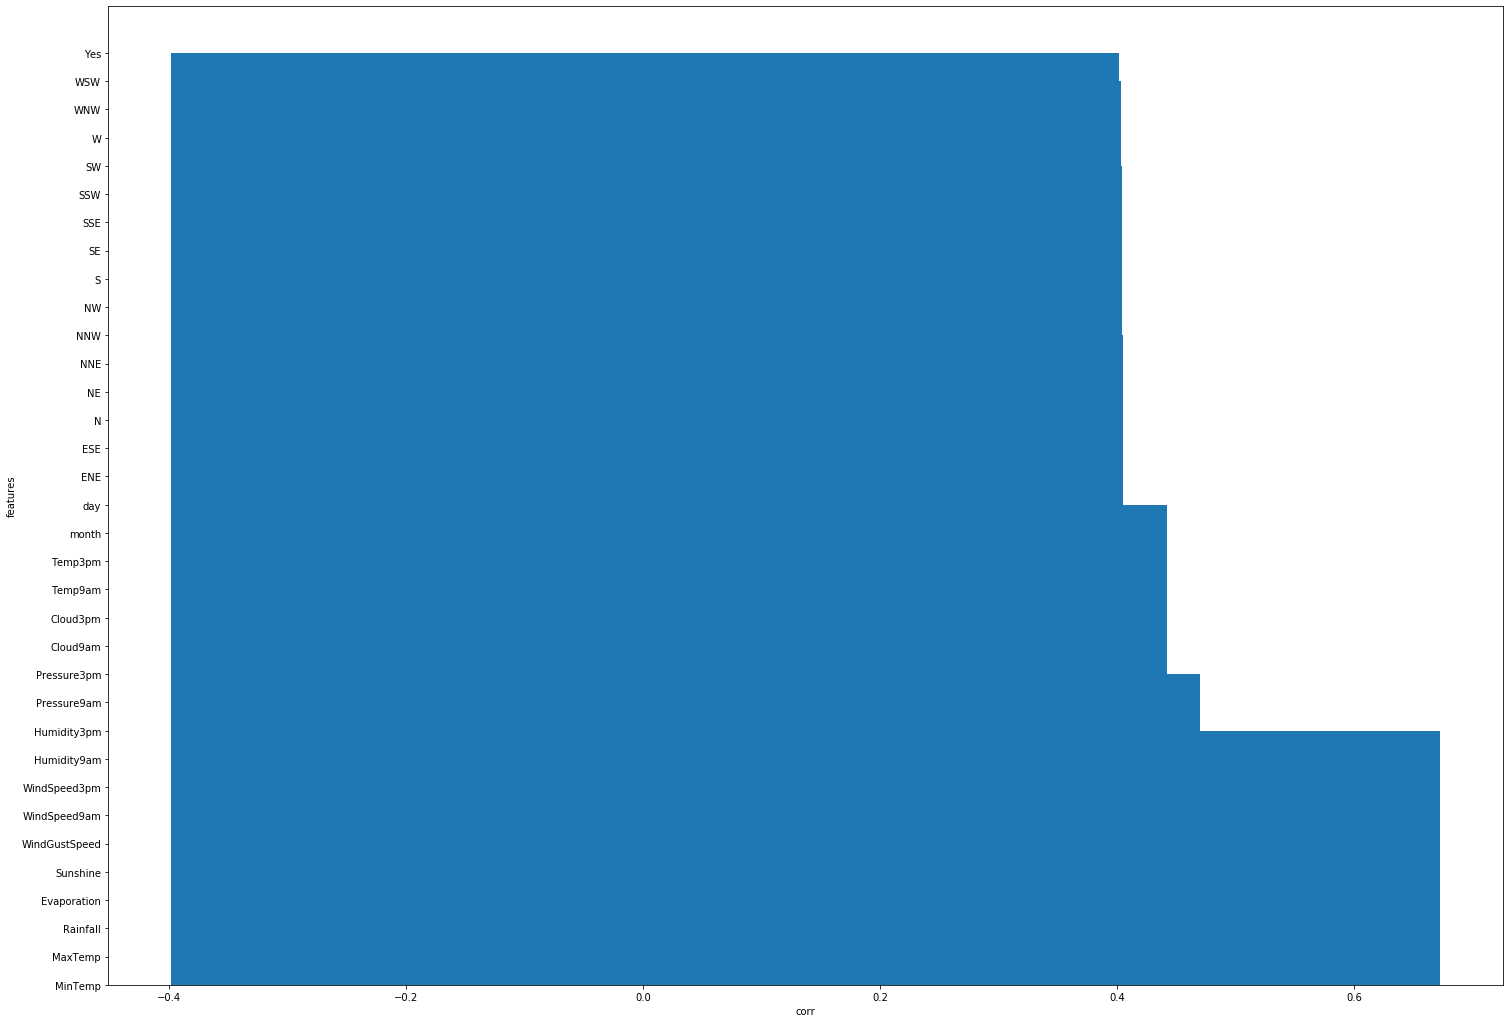

In [274]:
plt.figure(figsize=(25,18))
plt.bar(features_corr['corr'], features_corr['features'])
plt.xlabel('corr')
plt.ylabel('features')
plt.show()

In [275]:
#Predicting the target for test data
predictions = dtreemodel.predict(X_test)

In [276]:
# Export our trained model as a .dot file
from sklearn import tree
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(dtreemodel,
                              out_file=f,
                              max_depth = 10,
                              impurity = True,
                              feature_names=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'month', 'day', 'ENE', 'ESE', 'N',
       'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW',
       'WSW', 'Yes'],
                              class_names=['no', 'yes'],
                              rounded = True,
                              filled= True )

In [277]:
from subprocess import check_call
check_call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'])

0

In [278]:
dtreemodel.score(X_test, y_test)

0.785268882741807

In [284]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

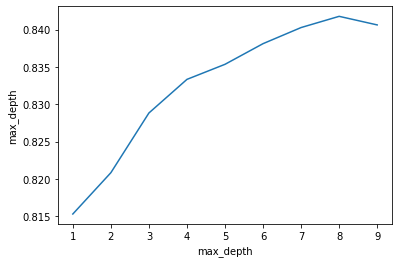

In [285]:
plt.xlabel("max_depth")
plt.ylabel("max_depth")
plt.plot(max_depth_range,accuracy)

In [286]:
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtreemodel = DecisionTreeClassifier(max_depth=9)
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions)}")


0.8405222935908856


In [292]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

          No       0.83      0.98      0.90     33192
         Yes       0.80      0.32      0.46      9466

    accuracy                           0.83     42658
   macro avg       0.82      0.65      0.68     42658
weighted avg       0.83      0.83      0.80     42658



In [293]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print([tp,fp])
print([fn,tn])

[3029, 761]
[6437, 32431]


In [287]:
# compare to random forrest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.8312626002156688


In [288]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [289]:
# random forrest model managed to improve the accuracy score 1. something percent.
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.844952881053964


In [290]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

          No       0.83      0.98      0.90     33192
         Yes       0.80      0.32      0.46      9466

    accuracy                           0.83     42658
   macro avg       0.82      0.65      0.68     42658
weighted avg       0.83      0.83      0.80     42658



In [291]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print([tp,fp])
print([fn,tn])

[3029, 761]
[6437, 32431]


In [ ]:
# the recall score were really bad in 'Yes' it must be something wrong with the input.
# try a version of adding up annual rain received, not fill up na data since it may also mean something important.